In [72]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))

from time import time

import numpy as np
import pandas as pd
import swifter

from matplotlib import pyplot as plt
import seaborn as sns

from ibgeapi.ibgeapi import *

## Carregamento dos dados anuais

In [106]:
df = pd.read_parquet("data2010to2021.parquet")
df.head(3)

,ano_exercicio,ds_municipio,ds_orgao,subelemento_cod,vl_despesa,tipo_orgao,municipio,cod_ibge,Município,ano,RCL,pib_nominal,população,atividade_principal,quantidade_total_vagas,vereadores,area,alunos_escola
0,2010,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,187,174090.99,Orgao de Ensino superior/pesquisa,adamantina,3500105,adamantina,2010,69138047.0,1054541,35023,Demais serviços,2002,9,411,2359
1,2010,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,199,16643.38,Orgao de Ensino superior/pesquisa,adamantina,3500105,adamantina,2010,69138047.0,1054541,35023,Demais serviços,2002,9,411,2359
2,2010,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,386,14005.31,Orgao de Ensino superior/pesquisa,adamantina,3500105,adamantina,2010,69138047.0,1054541,35023,Demais serviços,2002,9,411,2359


In [ ]:
df.query("subelemento_cod == 101 & ds_orgao == 'CENTRO UNIVERSITÁRIO DE ADAMANTINA'")

,ano_exercicio,ds_municipio,ds_orgao,subelemento_cod,vl_despesa,tipo_orgao,municipio,cod_ibge,Município,ano,RCL,pib_nominal,população,atividade_principal,quantidade_total_vagas,vereadores,area,alunos_escola
668572,2016,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,101,7878.09,Orgao de Ensino superior/pesquisa,adamantina,3500105,adamantina,2016,129896985.0,1054541,35023,Demais serviços,2002,9,411,2359
781322,2017,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,101,65427.89,Orgao de Ensino superior/pesquisa,adamantina,3500105,adamantina,2017,151059946.0,1054541,35023,Demais serviços,2002,9,411,2359


In [120]:
df2.query("subelemento_cod == 101 & ds_orgao == 'CENTRO UNIVERSITÁRIO DE ADAMANTINA' & (ano_exercicio == 2016 | ano_exercicio == 2017)")

,ds_municipio,ds_orgao,entidade_id,subelemento_cod,tipo_orgao,ds_tp_entidade,tam_serie,ano_exercicio,vl_despesa,RCL,pib_nominal,população,quantidade_total_vagas,vereadores,area,alunos_escola
6,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,16801,101,Orgao de Ensino superior/pesquisa,AUTARQUIA,13,2016,1.630003e+06,1.793747e+08,1054541,33797,2002,9,411,2359
7,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,16801,101,Orgao de Ensino superior/pesquisa,AUTARQUIA,13,2017,1.679974e+06,2.013478e+08,1054541,33797,2002,9,411,2359


In [105]:
df2 = pd.read_parquet("data2010to2022.parquet")
df2.head(3)

,ds_municipio,ds_orgao,entidade_id,subelemento_cod,tipo_orgao,ds_tp_entidade,tam_serie,ano_exercicio,vl_despesa,RCL,pib_nominal,população,quantidade_total_vagas,vereadores,area,alunos_escola
0,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,16801,101,Orgao de Ensino superior/pesquisa,AUTARQUIA,13,2010,395831.038061,1.434822e+08,1054541,33797,2002,9,411,2359
1,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,16801,101,Orgao de Ensino superior/pesquisa,AUTARQUIA,13,2011,349352.482636,1.546214e+08,1054541,33797,2002,9,411,2359
2,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,16801,101,Orgao de Ensino superior/pesquisa,AUTARQUIA,13,2012,283840.164264,1.528877e+08,1054541,33797,2002,9,411,2359


In [102]:
df = pd.read_parquet("data2010to2022.parquet")

# Seleciona apenas as colunas de interesse para o estudo
df = df.filter(["ds_municipio", "ds_orgao", "subelemento_cod", "ano_exercicio", "vl_despesa", "RCL", "pib_nominal", "população", "atividade_principal", "quantidade_total_vagas", "vereadores", "area", "alunos_escola"])
df.columns = ["ds_municipio", "ds_orgao", "subelemento_cod", "ano_exercicio", "vl_despesa", "RCL", "pib_nominal", "populacao", "atividade_principal", "quantidade_total_vagas", "vereadores", "area", "alunos_escola"]

print("Dimensões dos dados: {}".format(df.shape))
print("Número total de municípios: {}\n".format( len(df.ds_municipio.unique()) ))

display( df.head(3) )

Dimensões dos dados: (1048575, 13)
Número total de municípios: 644



,ds_municipio,ds_orgao,subelemento_cod,ano_exercicio,vl_despesa,RCL,pib_nominal,populacao,atividade_principal,quantidade_total_vagas,vereadores,area,alunos_escola
0,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,187,2010,174090.99,69138047.0,1054541,35023,Demais serviços,2002,9,411,2359
1,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,199,2010,16643.38,69138047.0,1054541,35023,Demais serviços,2002,9,411,2359
2,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,386,2010,14005.31,69138047.0,1054541,35023,Demais serviços,2002,9,411,2359


In [3]:
clustering1 = pd.read_parquet("cluster_divisions1.parquet")
clustering1.columns = ["ds_municipio", "cod_ibge", "cluster1", "cluster2", "cluster3", "cluster4"]
clustering1 = clustering1.filter(["ds_municipio", "cluster1", "cluster2", "cluster3", "cluster4"])

# Substitui o apóstrofe em alguns nomes de cidade por espaço para padronizar com os dados originais
clustering1.ds_municipio = clustering1.ds_municipio.str.replace("d'", "d ")

print("Número total de municípios: {}".format( len(df.ds_municipio.unique()) ))
print("Números de clusters em cada divisão: {}\n".format( len(clustering1.cluster1.unique()) ))

display( clustering1.head(3) )

Número total de municípios: 644
Números de clusters em cada divisão: 5



,ds_municipio,cluster1,cluster2,cluster3,cluster4
0,Adamantina,3,4,4,1
1,Aguaí,3,0,4,0
2,Agudos,3,3,4,0


In [4]:
df = df.merge(clustering1, on = "ds_municipio")
df.head(3)

,ds_municipio,ds_orgao,subelemento_cod,ano_exercicio,vl_despesa,RCL,pib_nominal,populacao,atividade_principal,quantidade_total_vagas,vereadores,area,alunos_escola,cluster1,cluster2,cluster3,cluster4
0,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,187,2010,174090.99,69138047.0,1054541,35023,Demais serviços,2002,9,411,2359,3,4,4,1
1,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,199,2010,16643.38,69138047.0,1054541,35023,Demais serviços,2002,9,411,2359,3,4,4,1
2,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,386,2010,14005.31,69138047.0,1054541,35023,Demais serviços,2002,9,411,2359,3,4,4,1


## Funções para o Preprocessamento de dados

Façamos algumas funções com o objetivo de facilitar o tratamento geral dos dados, como por exemplo a função que passa cada combinação de órgão e código de despesa como uma única série de observações e sua função inversa. Ambas essas funções são cruciais para a etapa de préprocessamento de dados, uma vez que tem-se a ideia de padronizar os valores das séries de despesas segundo suas respectivas séries temporais.

In [63]:
def agrupar_dataframe(
    df, index_columns = ["ds_municipio", "ds_orgao", "subelemento_cod"],
    list_columns = ["ano_exercicio", "vl_despesa", "RCL"],
    candidate_columns = ["pib_nominal", "atividade_principal", "quantidade_total_vagas", "vereadores", "area", "alunos_escola"],
    sizes = True
):
    '''
        Agrupa algumas colunas dos dados de despesa como séries temporais a partir da definição de índices.
        args:
            df: DataFrame
                Conjunto de dados tratado
            index_columns: list
                Colunas utilizadas como índice para o agrupamento das séries
            list_columns: list
                Colunas a serem agrupadas como listas (séries)
            candidate_columns: list
                Colunas a serem agregadas como constantes em relação às séries. Caso não existentes no conjunto de dados são desconsideradas
            sizes: bool
                Se devem ser retornados os tamanhos individuais de cada série de despesas
    '''
    # Tabela com apenas os índices
    df_grouped = df.groupby(index_columns).size().reset_index().rename(columns = {0:"tam_serie"})
    
    # Formata as colunas em list_columns como listas em cada índice
    for column in list_columns:
        column_grouped = df.groupby(index_columns)[column].apply(lambda x : np.array(list(x))).reset_index()
        df_grouped = df_grouped.merge(column_grouped, on = index_columns).reset_index(drop = True)
    
    # Dicionário como as informações das colunas a serem tratadas como constantes
    constant_dict = {}
    for column in candidate_columns:
        if(column in df.columns):
            constant_dict[column] = "first"
    
    if(len(constant_dict) > 0):
        constant_df = df.groupby(index_columns).agg(constant_dict)
        df_grouped = df_grouped.merge(constant_df, on = index_columns).reset_index(drop = True)
    
    return df_grouped

def desagrupar_dataframe(df_grouped, explode_candidates = ["ano_exercicio", "vl_despesa", "RCL"], remove_size = True):
    '''
        Faz o processo reverso da função ``agrupar_dataframe``.
        args:
            df_grouped: DataFrame
                Conjunto de dados agrupados no padrão da função ``agrupar_dataframe``
            explode_candidates: list
                Lista de colunas candidatas a serem desserializadas. Caso não existentes no conjunto de dados são desconsideradas
    '''
    columns_to_explode = []
    for column in explode_candidates:
        if(column in df_grouped.columns):
            columns_to_explode.append(column)
    
    df = df_grouped.explode(columns_to_explode)
    
    if("ano_exercicio" in df.columns):
        df.ano_exercicio = df.ano_exercicio.astype(int)
    if("vl_despesa" in df.columns):
        df.vl_despesa = df.vl_despesa.astype(np.float64)
    
    df = df.reset_index(drop=True)
    if(remove_size and "tam_serie" in df.columns):
        df = df.filter(df.columns[df.columns != "tam_serie"])
    
    return df

## Deflacionamento de preços

Para o deflacionamento dos preços das despesas consideramos a função já implementada destinada à consulta do valores do Índice Nacional de Preços ao Consumidor Amplo Acumulado (IPCA) nos períodos. Neste caso em específico consideramos os índices todos no mês de junho, uma vez que são considerados apenas preços anuais, em contrapartida, a função de consulta seja flexível a ponto de possibilitar diferentes meses.

In [51]:
# Períodos consultados pelo IPCA
anos = anos = df.ano_exercicio.unique()
meses = np.repeat(6, len(anos))

# Períodos de referência para os preços
ano_ref = 2020
mes_ref = 6

# IPCA nos meses especificados
i_values = dict(zip(anos, consulta_ipca(meses, anos)))
# IPCA no mês de referência
i_ref = consulta_ipca(mes_ref, ano_ref)

# Para cada linha do conjunto de dados, obtém o fator de correção de preços segundo os valores do IPCA
fat_cor = df.ano_exercicio.swifter.progress_bar(False).apply( lambda ano : i_ref/i_values[ano] )
vl_despesa = df.vl_despesa
vl_despesa_defl = vl_despesa*fat_cor

df = df.assign(vl_despesa_defl = vl_despesa_defl)
df = df.filter(["ds_municipio", "ds_orgao", "subelemento_cod", "ano_exercicio", "vl_despesa", "vl_despesa_defl", "RCL", "pib_nominal", "população", "atividade_principal", "quantidade_total_vagas", "vereadores", "area", "alunos_escola"])
df.head(3)

,ds_municipio,ds_orgao,subelemento_cod,ano_exercicio,vl_despesa,vl_despesa_defl,RCL,pib_nominal,atividade_principal,quantidade_total_vagas,vereadores,area,alunos_escola
0,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,187,2010,174090.99,298036.674105,69138047.0,1054541,Demais serviços,2002,9,411,2359
1,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,199,2010,16643.38,28492.787714,69138047.0,1054541,Demais serviços,2002,9,411,2359
2,Adamantina,CENTRO UNIVERSITÁRIO DE ADAMANTINA,386,2010,14005.31,23976.519475,69138047.0,1054541,Demais serviços,2002,9,411,2359


Neste caso, veja que uma despesa avaliada em $R\$174090,99$ no ano de 2010 é comparável a uma despesa de $R\$298036.67$ no ano de 2020. Embora o índice de preços ao consumidor amplo sejam estimativas, ao padronizarmos todos os dados segundo esta medida, é possível compararmos as observações de diferentes datas. Removendo o efeito da inflação dos dados é um ótimo começo para a identificação de anomalias nos preços. Como exemplificação, abaixo fazemos um gráfico das despesas anuais acumuladas de cada município antes e após o processo de deflacionamento de dados.

In [53]:
df_grouped = (
    df.
    groupby(["ds_municipio", "ano_exercicio"]).
    agg({
        "vl_despesa": "sum",
        "vl_despesa_defl": "sum"
    }).
    reset_index()
)
display( df_grouped.head(3) )

,ds_municipio,ano_exercicio,vl_despesa,vl_despesa_defl
0,Adamantina,2010,72898020.14,1.247984e+08
1,Adamantina,2011,81566016.51,1.308540e+08
2,Adamantina,2012,85067573.29,1.300776e+08


In [66]:
df_grouped_list = agrupar_dataframe(df_grouped, index_columns = ["ds_municipio"], list_columns = ["ano_exercicio", "vl_despesa", "vl_despesa_defl"])
df_grouped_list.head(3)

,ds_municipio,tam_serie,ano_exercicio,vl_despesa,vl_despesa_defl
0,Adamantina,10,"[2010, 2011, 2012, 2013, 2014, 2015, 2016, 201...","[72898020.14, 81566016.51, 85067573.29000002, ...","[124798437.13546117, 130854048.97752544, 13007..."
1,Adolfo,10,"[2010, 2011, 2012, 2013, 2014, 2015, 2016, 201...","[12306911.959999999, 12879712.56, 17765388.97,...","[21068931.304609712, 20662557.891815938, 27165..."
2,Aguaí,10,"[2010, 2011, 2012, 2013, 2014, 2015, 2016, 201...","[49117197.72, 55640617.73999999, 54147793.3300...","[84086639.11800767, 89262666.37033944, 8279790..."


In [71]:
np.sum(df_grouped_list.tam_serie < 10)

462

In [55]:
help(agrupar_dataframe)

Help on function agrupar_dataframe in module __main__:

agrupar_dataframe(df, index_columns=['ds_municipio', 'ds_orgao', 'subelemento_cod'], list_columns=['ano_exercicio', 'vl_despesa', 'RCL'], candidate_columns=['pib_nominal', 'atividade_principal', 'quantidade_total_vagas', 'vereadores', 'area', 'alunos_escola'], sizes=True)
    Agrupa algumas colunas dos dados de despesa como séries temporais a partir da definição de índices.
    args:
        df: DataFrame
            Conjunto de dados tratado
        index_columns: list
            Colunas utilizadas como índice para o agrupamento das séries
        list_columns: list
            Colunas a serem agrupadas como listas (séries)
        candidate_columns: list
            Colunas a serem agregadas como constantes em relação às séries. Caso não existentes no conjunto de dados são desconsideradas
        sizes: bool
            Se devem ser retornados os tamanhos individuais de cada série de despesas



<Axes: xlabel='ano_exercicio', ylabel='vl_despesa'>

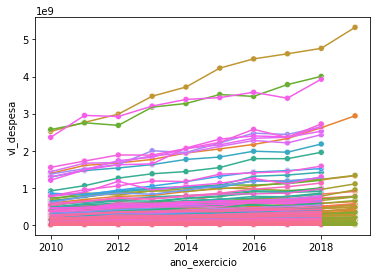

In [54]:
sns.lineplot(x = df_grouped.ano_exercicio, y = df_grouped.vl_despesa, hue = df_grouped.ds_municipio, legend = False)
sns.scatterplot(x = df_grouped.ano_exercicio, y = df_grouped.vl_despesa, hue = df_grouped.ds_municipio, legend = False)